In [2]:
from PIL import Image

plot_dirc = "./results/entropic_measures_5_seed_1009_samples_5000_dim_2_epsilon_10/plots"

# Paths to the uploaded images
image_paths = [
    f"{plot_dirc}/source_GMM_pdf.png",
    f"{plot_dirc}/auxiliary_0_pdf.png",
    f"{plot_dirc}/auxiliary_1_pdf.png",
    f"{plot_dirc}/auxiliary_2_pdf.png",
    f"{plot_dirc}/auxiliary_3_pdf.png",
    f"{plot_dirc}/auxiliary_4_pdf.png"
]

# Load the images
images = [Image.open(path) for path in image_paths]

# Get dimensions of individual images (assuming all are the same size)
image_width, image_height = images[0].size

# Define the layout (2 rows x 3 columns)
rows, cols = 2, 3

# Calculate dimensions for the combined image
combined_width = cols * image_width
combined_height = rows * image_height

# Create a new blank image with a white background
combined_image = Image.new("RGB", (combined_width, combined_height), "white")

# Place images into the combined image
for index, image in enumerate(images):
    row = index // cols
    col = index % cols
    x_offset = col * image_width
    y_offset = row * image_height
    combined_image.paste(image, (x_offset, y_offset))

# Save the combined image
output_path = f"{plot_dirc}/merged_2x3_initial_images.png"
combined_image.save(output_path)
output_path


'./results/entropic_measures_5_seed_1009_samples_5000_dim_2_epsilon_10/plots/merged_2x3_initial_images.png'

In [102]:
import pickle
save_pathname = "results/entropic_measures_5_seed_1009_samples_5000_dim_2_epsilon_10"
V_value_dirc = f"{save_pathname}/V_values"
W2_to_true_dirc = f"{save_pathname}/W2_to_true_bary"



In [8]:
import scipy.stats as stats
import numpy as np  

mean_true_V = np.mean(true_V_value_record)
std_true_V = np.std(true_V_value_record)
conf_interval = stats.norm.interval(0.95, loc=mean_true_V, scale=std_true_V)

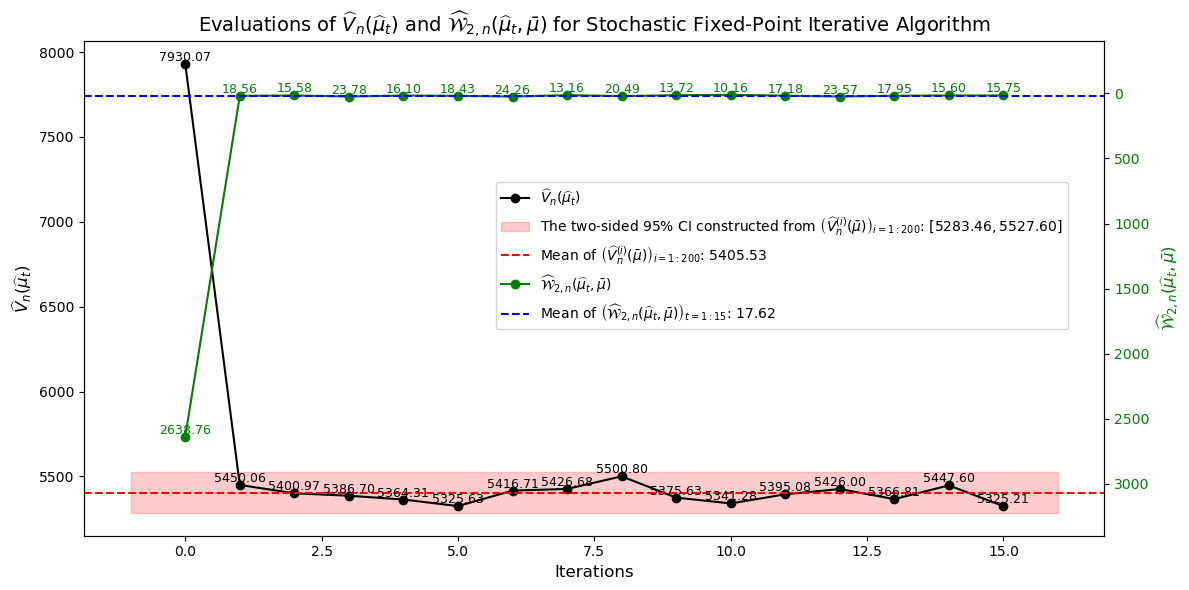

In [103]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the JSON files
with open(f"{V_value_dirc}/V_values.json", "r") as file1:
    v_data = json.load(file1)

with open(f"{W2_to_true_dirc}/W2_to_true_bary.json", "r") as file2:
    w2_data = json.load(file2)

# Extract values for V_values
with open(f"{save_pathname}/true_V_values.pkl", "rb") as f:
    true_v_value_record = pickle.load(f)
v_iterations = [int(key.split("_")[1]) for key in v_data.keys() if key.startswith("iteration")]
v_values = [v_data[key] for key in v_data.keys() if key.startswith("iteration")]

# Extract values for W2_to_bary
w2_iterations = [int(key.split("_")[1]) for key in w2_data.keys()]
w2_values = [w2_data[key] for key in w2_data.keys()]

# Filter iterations to include only up to iteration 15 for both
max_iteration = 15
filtered_v_iterations = [i for i in v_iterations if i <= max_iteration]
filtered_v_values = [v_values[v_iterations.index(i)] for i in filtered_v_iterations]
filtered_w2_iterations = [i for i in w2_iterations if i <= max_iteration]
filtered_w2_values = [w2_values[w2_iterations.index(i)] for i in filtered_w2_iterations]

# Calculate statistics for true_V_values
mean_true_V = np.mean(true_v_value_record)
std_true_V = np.std(true_v_value_record)
conf_interval = stats.norm.interval(0.95, loc=mean_true_V, scale=std_true_V)

# Create a plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot V_values on the left y-axis
conf_interval_label = (
    r"The two-sided 95% CI constructed from $\left(\widehat{V}_n^{(i)}(\bar{\mu})\right)_{i = 1: 200}$: "
    f"$[{conf_interval[0]:.2f}, {conf_interval[1]:.2f}]$"
)
mean_true_V_label = (
    r"Mean of $\left(\widehat{V}_n^{(i)}(\bar{\mu})\right)_{i = 1: 200}$: "
    f"{mean_true_V:.2f}"
)
ax1.plot(filtered_v_iterations, filtered_v_values, label=r"$\widehat{V}_n(\widehat{\mu}_t)$", color="black", marker="o", linestyle="-")
ax1.fill_between(
    range(-1, max_iteration + 2),  # Extend the region beyond the iteration range
    conf_interval[0], 
    conf_interval[1], 
    color="red", 
    alpha=0.2, 
    label=conf_interval_label
)  # Shadow the confidence interval
ax1.axhline(y=mean_true_V, color="red", linestyle="--", label=mean_true_V_label)
ax1.set_xlabel("Iterations", fontsize=12)
ax1.set_ylabel(r"$\widehat{V}_n(\widehat{\mu}_t)$", fontsize=12, color="black")
ax1.tick_params(axis="y", labelcolor="black")

# Annotate each point with its value
for i, v in zip(filtered_v_iterations, filtered_v_values):
    ax1.text(i, v, f"{v:.2f}", color="black", fontsize=9, ha="center", va="bottom")

# Add annotation for the mean
# ax1.text(
#     filtered_v_iterations[0] - 2, 
#     mean_true_V, 
#     f"Mean: {mean_true_V:.2f}", 
#     color="red", 
#     fontsize=9, 
#     va="bottom", 
#     ha="left"
# )

# Create a secondary y-axis for W2 values
ax2 = ax1.twinx()
ax2.plot(
    filtered_w2_iterations, 
    filtered_w2_values, 
    label=r"$\widehat{\mathcal{W}}_{2, n}(\widehat{\mu}_t, \bar{\mu})$", 
    color="green", 
    marker="o"
)
ax2.set_ylabel(r"$\widehat{\mathcal{W}}_{2, n}(\widehat{\mu}_t, \bar{\mu})$", fontsize=12, color="green")
ax2.tick_params(axis="y", labelcolor="green")
ax2.invert_yaxis()  # Reverse the secondary y-axis
ax2.set_ylim(3400, -400)

mean_w2 = np.mean(filtered_w2_values[1:])
mean_w2_label = (
                r"Mean of $\left(\widehat{\mathcal{W}}_{2, n}(\widehat{\mu}_t, \bar{\mu})\right)_{t = 1: 15}$: " 
                f"{mean_w2:.2f}"
                )
ax2.axhline(y=mean_w2, color="blue", linestyle="--", label=mean_w2_label)

# Annotate each point with its value
for i, v in zip(filtered_w2_iterations, filtered_w2_values):
    ax2.text(i, v, f"{v:.2f}", color="green", fontsize=9, ha="center", va="bottom")

# Add title and legends
plt.title(r"Evaluations of $\widehat{V}_n(\widehat{\mu}_t)$ and $\widehat{\mathcal{W}}_{2, n}(\widehat{\mu}_t, \bar{\mu})$ for Stochastic Fixed-Point Iterative Algorithm", fontsize=14)
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.7), fontsize=10)

# Show the plot
plot_save_path = f"{save_pathname}/V_and_W2_comparison_with_conf_interval.png"
plt.savefig(plot_save_path)
plt.show()


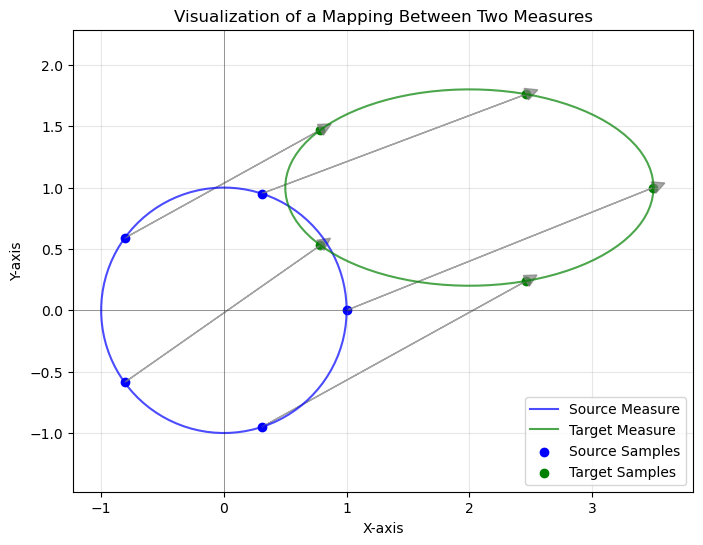

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Define the first measure (source) as a circle
theta = np.linspace(0, 2 * np.pi, 100)
source_x = np.cos(theta)  # Circle x-coordinates
source_y = np.sin(theta)  # Circle y-coordinates

# Define the second measure (target) as an ellipse
target_x = 1.5 * np.cos(theta) + 2  # Ellipse x-coordinates shifted to the right
target_y = 0.8 * np.sin(theta) + 1  # Ellipse y-coordinates shifted up

# Sample points from the source measure
num_samples = 5
sample_angles = np.linspace(0, 2 * np.pi, num_samples, endpoint=False)
sample_source_points = np.array([np.cos(sample_angles), np.sin(sample_angles)]).T

# Define the mapping: Map the source points to target points
sample_target_points = np.array([1.5 * np.cos(sample_angles) + 2, 0.8 * np.sin(sample_angles) + 1]).T

# Plot the source and target measures
plt.figure(figsize=(8, 6))
plt.plot(source_x, source_y, label="Source Measure", color="blue", alpha=0.7)
plt.plot(target_x, target_y, label="Target Measure", color="green", alpha=0.7)

# Plot the sampled points
plt.scatter(sample_source_points[:, 0], sample_source_points[:, 1], color="blue", label="Source Samples")
plt.scatter(sample_target_points[:, 0], sample_target_points[:, 1], color="green", label="Target Samples")

# Draw arrows to visualize the mapping
for i in range(num_samples):
    plt.arrow(
        sample_source_points[i, 0], sample_source_points[i, 1],
        sample_target_points[i, 0] - sample_source_points[i, 0],
        sample_target_points[i, 1] - sample_source_points[i, 1],
        head_width=0.1, head_length=0.1, fc="gray", ec="gray", alpha=0.7
    )

# Add labels and legend
plt.title("Visualization of a Mapping Between Two Measures")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axhline(0, color='black', linewidth=0.5, alpha=0.5)
plt.axvline(0, color='black', linewidth=0.5, alpha=0.5)
plt.grid(alpha=0.3)
plt.legend()
plt.axis("equal")  # Ensure equal scaling for x and y axes
plt.show()


Draw the Mapping Plot

In [53]:
import pickle
import os
import sys
# Get the parent folder path (folder K)
parent_folder = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
print(parent_folder)

# Add folder A to the Python path
folder_classes_path = os.path.join(parent_folder, 'classes')
sys.path.append(folder_classes_path)

/Users/zeyichen/GitHub/Repo/WB_Algo/Stochastic_FP


In [54]:
from true_WB import *
from input_generate_plugin import *
from entropic_estimate_OT import *
from entropic_iterative_scheme import *
from config_log import *
from measure_visualize import *
from input_generate_entropy import *
from sample_plot import *

In [55]:
dim = 2
num_samples = 5000
num_measures = 5
iter = 0
truncated_radius = 150
seed = 1009

In [56]:
source_sampler = MixtureOfGaussians(dim)
source_sampler.random_components(num_components=5, uniform_weights = True, seed = seed) # seed from the measure selection
# source_sampler.set_truncation(truncated_radius)
auxiliary_measure_sampler_set = []
for auxiliary_seed in [1010, 1018, 1014, 1016, 1003]:
    auxiliary_measure_sampler = MixtureOfGaussians(dim)
    auxiliary_measure_sampler.random_components(num_components=5, uniform_weights = True, seed = auxiliary_seed)
    # auxiliary_measure_sampler.set_truncation(truncated_radius)
    auxiliary_measure_sampler_set.append(auxiliary_measure_sampler)

In [57]:
# construct entropic_sampler
entropic_sampler = entropic_input_sampler(dim, 
                                          num_measures, 
                                          auxiliary_measure_sampler_set, 
                                          source_sampler = source_sampler, 
                                          n_k = 1000, 
                                          seed = 120, 
                                          gamma = 0.3, 
                                          manual = True,
                                          truncated_radius = truncated_radius,
                                          bound_type = "eigen_bound")

In [58]:
epsilon = 10
result_dir = "results"
os.makedirs(result_dir, exist_ok=True)
save_pathname = f"{result_dir}/entropic_measures_{num_measures}_seed_{seed}_samples_{num_samples}_dim_{dim}_epsilon_{epsilon}"
os.makedirs(save_pathname, exist_ok=True)

In [59]:
# Load the sampler attributes
with open(f"{save_pathname}/entropic_sampler_info.pkl", "rb") as f:
    loaded_data_entropic_sampler = pickle.load(f)

with open(f"{save_pathname}/source_sampler_info.pkl", "rb") as f:
    loaded_data_source_sampler = pickle.load(f)

print("Loaded Data for Entropic Sampler:", loaded_data_entropic_sampler)
print("Loaded Data for Source Sampler:", loaded_data_source_sampler)

Loaded Data for Entropic Sampler: {'dim': 2, 'num_measures': 5, 'auxiliary_measure_sampler_set': [<true_WB.MixtureOfGaussians object at 0x14f84b450>, <true_WB.MixtureOfGaussians object at 0x1817b5950>, <true_WB.MixtureOfGaussians object at 0x1817b5dd0>, <true_WB.MixtureOfGaussians object at 0x1817b6250>, <true_WB.MixtureOfGaussians object at 0x1817b66d0>], 'tilde_K': 5, 'source_sampler': <true_WB.MixtureOfGaussians object at 0x1817b6c10>, 'n_k': 1000, 'seed': 120, 'rng_entropy': RandomState(MT19937) at 0x140E79240, 'gamma': 0.3, 'manual': True, 'truncated_radius': 150, 'bound_type': 'eigen_bound', 'grid_size': 200, 'strong_convexity_param_dict': {0: 0.0001, 1: 0.0001, 2: 0.0001, 3: 0.0001, 4: 0.0001}, 'theta_dict': {0: 10, 1: 10, 2: 10, 3: 10, 4: 10}, 'Y_matrix_dict': {0: array([[ 83.25389778,  -6.77748404],
       [-24.38674772, -23.76266702],
       [ 97.2196175 ,  -0.66185246],
       ...,
       [-35.17059538,  10.05658482],
       [-14.49614928, -84.75519572],
       [-10.84955811

In [60]:
source_sampler = MixtureOfGaussians(dim)
source_sampler.__dict__.update(loaded_data_source_sampler)

entropic_sampler = entropic_input_sampler(dim, num_measures, auxiliary_measure_sampler_set, source_sampler = source_sampler, n_k = 1000, seed = 120)
entropic_sampler.__dict__.update(loaded_data_entropic_sampler)

In [61]:
OT_collections = {}

In [62]:
def iterative_sample(iter, num_samples = 500):
    count = 0
    accepted = np.zeros((num_samples, dim))
    initialized = np.zeros((num_samples, dim))

    with tqdm(total=num_samples, desc=f"sampling from the pushforward measure at iteration_{iter}") as pbar:
        while count < num_samples:
            sample = np.random.multivariate_normal(np.zeros(dim), np.eye(dim))

            for t in range(iter):
                # to be executed only when iter > 0
                sum_sample = np.zeros(dim)
                for measure_index in range(num_measures):
                    OT_map_estimator = OT_collections[(t, measure_index)]
                    sub_sample = OT_map_estimator.regularize_entropic_OT_map(truncated_radius**2, sample)
                    sum_sample += sub_sample

                # Average the pushforward samples from all measures
                new_sample = sum_sample / num_measures

            if iter == 0:
                new_sample = sample

            # Check if the sample is within the truncation radius
            if np.linalg.norm(new_sample) < truncated_radius:
                accepted[count, :] = new_sample
                initialized[count, :] = sample
                count += 1
                if (count + 1) % 10 == 0:
                    pbar.update(10)
                        
    return accepted, initialized
    

In [63]:
def map_construct(accepted_samples, iter, epsilon = 10):

    num_samples = accepted_samples.shape[0]
    # entropic_sampler = self.entropic_sampler
    input_measures_samples = entropic_sampler.sample(num_samples) # this is a dictionary with k keys, each key is a list of samples from the k-th measure

    BX = accepted_samples

    for measure_index in tqdm(range(num_measures)):
        BY = np.array(input_measures_samples[measure_index])
        OT_map_estimator = entropic_OT_map_estimate(BX, BY, log = True)
        OT_map_estimator.get_dual_potential(epsilon = epsilon)
        OT_collections[(iter, measure_index)] = OT_map_estimator

In [64]:
iter = 0
while iter < 2:
    accepted, initialized = iterative_sample(iter, num_samples = 2000)
    # source_samples = source_sampler.sample(num_samples)
    if iter == 0:
        map_construct(accepted, iter, epsilon)
    iter += 1


sampling from the pushforward measure at iteration_0: 100%|██████████| 2000/2000 [00:00<00:00, 15318.52it/s]
100%|██████████| 5/5 [00:07<00:00,  1.40s/it]
sampling from the pushforward measure at iteration_1: 100%|██████████| 2000/2000 [00:09<00:00, 203.49it/s]


In [65]:
n = len(accepted)
n

2000

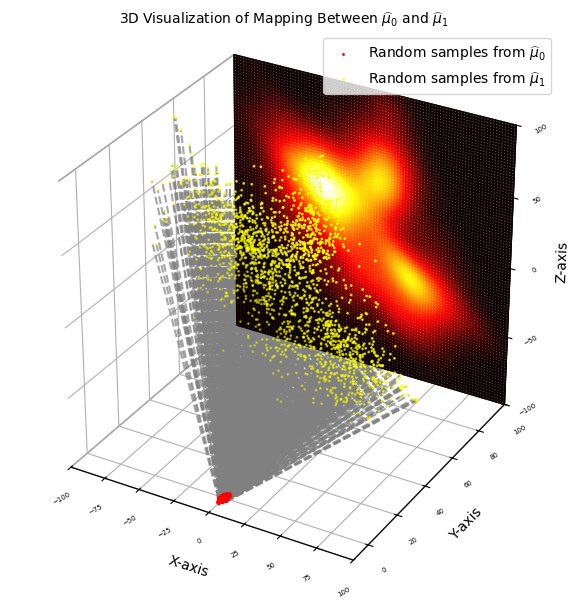

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n = len(accepted)

source_samples = initialized
target_samples = accepted 

# Add z-coordinates for the source (z = 0) and target (x = 100) planes
source_samples_3d = np.hstack([source_samples, np.zeros((n, 1)) - 100])  # z = -100 for source plane
target_samples_3d = np.hstack([target_samples[:, 0].reshape(-1, 1), np.ones((n, 1)) * 50, target_samples[:, 1].reshape(-1, 1)]) # x = 100 for target plane

# Create a 3D plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1]) 
ax.set_facecolor("white")  # Set background color to black

# Plot the source samples on z = 0
ax.scatter(source_samples_3d[:, 0], source_samples_3d[:, 1], source_samples_3d[:, 2],
           color="red", label= r"Random samples from $\widehat{\mu}_0$", s = 1)

# Plot the target samples on x = 100
ax.scatter(target_samples_3d[:, 0], target_samples_3d[:, 1], target_samples_3d[:, 2],
           color="yellow", label= r"Random samples from $\widehat{\mu}_1$", s = 1)

# Draw lines to visualize the mapping
for i in range(n):
    ax.plot(
        [source_samples_3d[i, 0], target_samples_3d[i, 0]],
        [source_samples_3d[i, 1], target_samples_3d[i, 1]],
        [source_samples_3d[i, 2], target_samples_3d[i, 2]],
        color="gray", linestyle="--", alpha=0.7
    )

# Kernel Density Estimation (KDE) for target samples
xy = np.vstack([target_samples[:, 0], target_samples[:, 1]])
kde = gaussian_kde(xy)
xi, zi = np.linspace(-100, 100, 100), np.linspace(-100, 100, 100)
xi, zi = np.meshgrid(xi, zi)
xz_coords = np.vstack([xi.ravel(), zi.ravel()])
kde_values = kde(xz_coords).reshape(xi.shape)

# Plot the KDE heatmap as a surface on y = 100
ygrid = np.ones_like(xi) * 100  # y = 100 plane
ax.plot_surface(xi, ygrid, zi, facecolors=plt.cm.hot(kde_values / np.max(kde_values)), rstride=1, cstride=1, alpha=0.7, shade=False)

# # Generate heatmap for the target samples on y = 100
# heatmap, xedges, zedges = np.histogram2d(target_samples[:, 0], target_samples[:, 1], bins=200, range=[[-100, 100], [-100, 100]])
# xcenters = 0.5 * (xedges[:-1] + xedges[1:])
# zcenters = 0.5 * (zedges[:-1] + zedges[1:])

# # Plot the heatmap as a surface on y = 100
# xgrid, zgrid = np.meshgrid(xcenters, zcenters)
# ygrid = np.ones_like(xgrid) * 100  # y = 100 plane
# ax.plot_surface(xgrid, ygrid, zgrid, facecolors=plt.cm.hot(heatmap.T / np.max(heatmap)), rstride=1, cstride=1, alpha=0.7, shade=False)

# Set labels and title
ax.set_title(r"3D Visualization of Mapping Between $\widehat{\mu}_0$ and $\widehat{\mu}_1$", fontsize=10, color="black")
ax.set_xlabel("X-axis", color="black")
ax.set_ylabel("Y-axis", color="black")
ax.set_zlabel("Z-axis", color="black")
ax.set_zticks(np.linspace(-100, 100, 5)) 

# Set axis ranges to [-100, 100]
ax.set_xlim([-100, 100])
ax.set_ylim([-10, 100])
ax.set_zlim([-100, 100])

# Customize tick colors
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.tick_params(axis='z', colors='black')

# Make the grid lines and pane colors match the background
ax.xaxis.pane.set_edgecolor("black")
ax.yaxis.pane.set_edgecolor("black")
ax.zaxis.pane.set_edgecolor("black")
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Add legend and grid
ax.legend(loc="upper right", bbox_to_anchor=(1, 1))
ax.grid(alpha=0)

# Rotate tick labels for better visibility
ax.tick_params(axis='x', labelsize=5, rotation=30)  # Adjust X-axis ticks
ax.tick_params(axis='y', labelsize=5, rotation=30)  # Adjust Y-axis ticks
ax.tick_params(axis='z', labelsize=5, rotation=30)  # Adjust Z-axis ticks


# Tighten the layout to fit everything properly
plt.tight_layout()


# Show the plot
plot_save_path = f"{save_pathname}/Map_Visualization.png"
plt.savefig(plot_save_path)
# Show the plot
plt.show()


In [80]:
source_measure_samples = source_sampler.sample(2000, multiplication_factor=1)


source sampling: 100%|██████████| 2000/2000 [00:00<00:00, 11143.74it/s]


In [81]:
dim = source_measure_samples.shape[1]
if dim > 2:
    # Perform PCA to reduce dimensions to 2D
    pca = PCA(n_components=2)
    samples = pca.fit_transform(source_measure_samples)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)
# Use a black background
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
# Set axis limits to include all samples and contours


ax.set_xlim(-120, 100)
ax.set_ylim(-100, 100)
# Get KDE data
x_mesh, y_mesh, kde_values = get_kde_data(source_measure_samples)
# Plot KDE as a contour plot
h = ax.contourf(x_mesh, y_mesh, kde_values, levels=200, cmap='hot')
# Overlay scatter plot if requested

# Set title and labels
ax.set_title('Samples', color='white')
ax.set_xlabel('X1', color='white')
ax.set_ylabel('X2', color='white')

# Adjust axis colors for visibility on black background
ax.tick_params(colors='white')
# Add a colorbar
cbar = fig.colorbar(h, ax=ax)
cbar.ax.yaxis.set_tick_params(color='white')
cbar.outline.set_edgecolor('white')


os.makedirs(save_pathname, exist_ok=True)
# Save the figure
plt.savefig(f"{save_pathname}/source_measure_plot.png", facecolor='black')
# Close the plot to free memory
plt.close()

